In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import config
from dataset import OCRDataset
from utils import *

In [2]:
root_dir = '../../data/komonjo/200003076/'
path_to_annotation_csv = root_dir + '200003076_coordinate.csv'
original_image_dir = root_dir + 'images/'
resized_image_dir = root_dir + 'images_resized_640/'

In [3]:
preprocessed_annotation = preprocess_annotation(path_to_annotation_csv, original_image_dir)

utf16_to_index, index_to_utf16 = make_maps_between_index_and_frequent_characters_utf16(preprocessed_annotation, 
                                                                                       config.N_KINDS_OF_CHARACTERS)

selected_annotation = select_annotation_and_convert_ut16_to_index(preprocessed_annotation, utf16_to_index)

dataset = OCRDataset(resized_image_dir, selected_annotation)

In [4]:
utf16_to_index

{'U+3057': 1, 'U+3066': 3, 'U+306B': 2, 'U+306E': 0, 'U+306F': 4}

In [5]:
index = 13
image, label = dataset.__getitem__(index)
bboxes = dataset.label2bboxes(label)

In [6]:
color_map = ['red', 'green', 'blue', 'yellow', 'purple', 'brown', 'pink', 'cyan', 'orange', 'black']

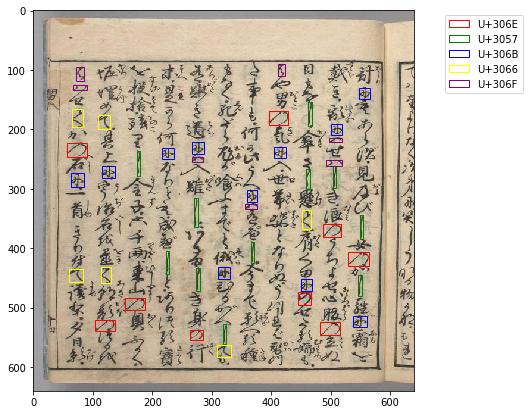

In [7]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
for char_index, bboxes_per_class in enumerate(bboxes):
    center_x, center_y, width, height = bboxes_per_class
    min_x = center_x - 0.5*width
    min_y = center_y - 0.5*height
    for idx, (mx, my, w, h) in enumerate(zip(min_x, min_y, width, height)):
        if idx == 0:
            rect = patches.Rectangle(xy=(mx, my), width=w, height=h, 
                                     fill=False, edgecolor=color_map[char_index], label=index_to_utf16[char_index])
        else:
            rect = patches.Rectangle(xy=(mx, my), width=w, height=h, 
                                     fill=False, edgecolor=color_map[char_index])        
        ax.add_patch(rect)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.imshow(image)